# Linear Models


Ramon Muñoz - A01330566

- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

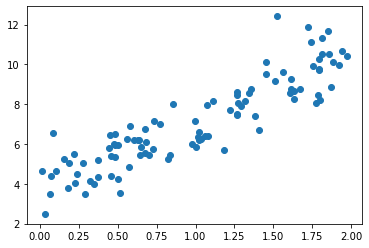

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [7]:
#X_fit[]

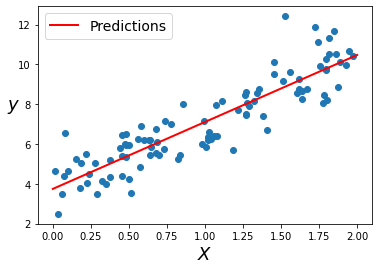

In [8]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [9]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [10]:
X_new.shape

(2, 1)

In [11]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [12]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [13]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [14]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

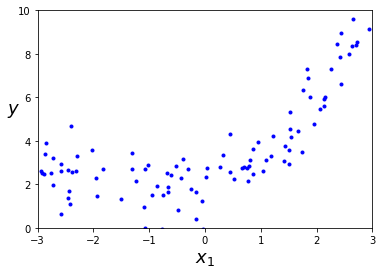

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [16]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [19]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [20]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [21]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

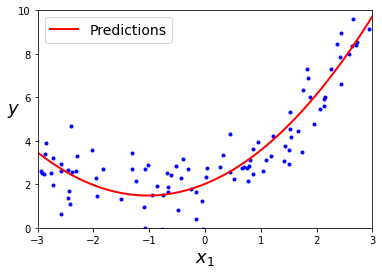

In [22]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [23]:
import pandas as pd
df = pd.read_csv('EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Number of Units     1000 non-null   float64
 1   Manufacturing Cost  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [25]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(x_train)}')
print(f'Tamaño de X_train: {x_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(x_test)}')
print(f'Tamaño del X_test: {x_test.shape}')

Numero total de registros en la bdd: 1000
**************************************************
Numero total de registros en el training set: 700
Tamaño de X_train: (700, 1)
**************************************************
Mumero total de registros en el test dataset: 300
Tamaño del X_test: (300, 1)


In [27]:
from sklearn import metrics
from sklearn.metrics import r2_score

dfErr = pd.DataFrame(columns = ["Method","Error Type","Value"])
print(dfErr)
def PrintEquation(coeff_,inter, degree, typ = "Single"):
    if typ == "Single":
        coeffs = coeff_
    else:
        coeffs = coeff_[0]
    
    Equ = "Y_hat = "
    VarNum = -1
    for i in range(0,len(coeffs)):
        Pwr = (i%(degree)+1)
        if Pwr == 1:
            VarNum+=1
            Equ = Equ + "%.3f"%(coeffs[i]) + "X" + str(VarNum) + " + "
        else:
            Equ = Equ + "%.3f"%(coeffs[i]) + "X" + str(VarNum) + "^" + str(Pwr) + " + "
       
    Equ = Equ + "%.3f"%(inter)
    print(Equ)
    
def PrintInformation(y_real,y_pred, ModelName, model, modelDegree, typ = "Single"):
    global dfErr
    print("===== "+ModelName+" =====")
    PrintEquation(model.coef_,model.intercept_,modelDegree,typ)
        
    print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_real, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_real, y_pred)))
    print('r2_score',r2_score(y_real, y_pred))

    dict = {"Method":[ModelName,ModelName,ModelName],"Error Type":["MAE","RMSE","R2"],"Value":[metrics.mean_absolute_error(y_real, y_pred),np.sqrt(metrics.mean_squared_error(y_real, y_pred)),r2_score(y_real, y_pred)]}

    df2 = pd.DataFrame(dict)
    dfErr = pd.concat([dfErr, df2], ignore_index = True)

Empty DataFrame
Columns: [Method, Error Type, Value]
Index: []


## Regresion Lineal

<AxesSubplot:xlabel='Number of Units', ylabel='Manufacturing Cost'>

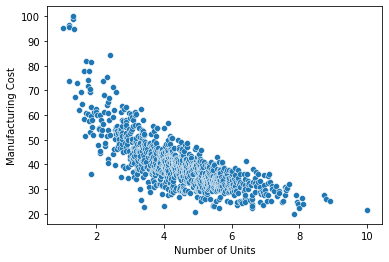

In [28]:
import seaborn as sns
sns.scatterplot(x=X['Number of Units'], y=y)

===== Linear Regression =====
Y_hat = -5.990X0 + 66.897
Error medio Absoluto (MAE): 4.848701594938562
Root Mean Squared Error: 6.73635897582296
r2_score 0.6056489925064351


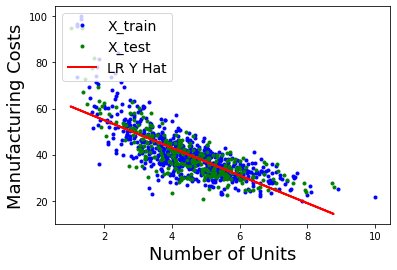

In [29]:
#lineal
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(x_train, y_train)

y_hat = linear_reg.predict(x_test)
PrintInformation(y_test,y_hat,"Linear Regression",linear_reg,1)
plt.plot(x_train['Number of Units'], y_train, "b.", label= "X_train")
plt.plot(x_test['Number of Units'], y_test, "g.", label = "X_test")
plt.plot(x_test['Number of Units'], y_hat, "r-", linewidth=2, label="LR Y Hat")
plt.xlabel("Number of Units", fontsize=18)
plt.ylabel("Manufacturing Costs", fontsize=18)
plt.legend(loc="upper left", fontsize=14)

## Polynomial

===== Polynomial =====
Y_hat = -16.311X0 + 1.122X0^2 + 88.643
Error medio Absoluto (MAE): 4.312234249307489
Root Mean Squared Error: 5.778833048851247
r2_score 0.7097897110152587


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


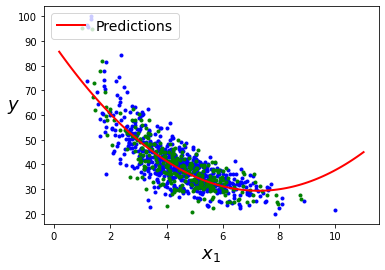

In [30]:
#polinomial
poly_features = PolynomialFeatures(degree=2, include_bias=False)
xp_train = poly_features.fit_transform(x_train)

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(xp_train, y_train)
lin_reg.coef_, lin_reg.intercept_

xp_test = poly_features.transform(x_test)
y_hat = lin_reg.predict(xp_test)
PrintInformation(y_test,y_hat,"Polynomial",lin_reg,2)

x_new = np.linspace(x_train['Number of Units'].min()-1, x_train['Number of Units'].max()+1, 100).reshape(100, 1)
xp_new = poly_features.transform(x_new)
y_new = lin_reg.predict(xp_new)

plt.plot(x_train['Number of Units'], y_train, "b.")
plt.plot(x_test['Number of Units'], y_test, "g.")
plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

## Ridge

===== Ridge =====
Y_hat = -5.941X0 + 66.681
Error medio Absoluto (MAE): 4.849216790345253
Root Mean Squared Error: 6.738548330987695
r2_score 0.6053926181894241


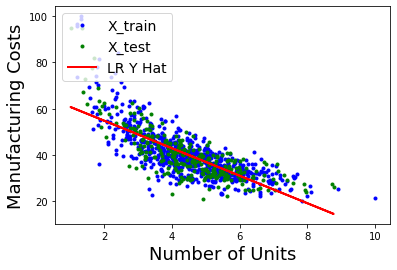

In [31]:
#Ridge Regression Model
from sklearn.linear_model import Ridge, RidgeCV, Lasso
ridgeReg = Ridge(alpha=10)
ridgeReg.fit(x_train,y_train)

y_hat = ridgeReg.predict(x_test)
PrintInformation(y_test,y_hat,"Ridge",ridgeReg,1)

plt.plot(x_train['Number of Units'], y_train, "b.", label= "X_train")
plt.plot(x_test['Number of Units'], y_test, "g.", label = "X_test")
plt.plot(x_test['Number of Units'], y_hat, "r-", linewidth=2, label="LR Y Hat")
plt.xlabel("Number of Units", fontsize=18)
plt.ylabel("Manufacturing Costs", fontsize=18)
plt.legend(loc="upper left", fontsize=14)

## Lasso

===== Lasso =====
Y_hat = -3.136X0 + 54.142
Error medio Absoluto (MAE): 5.573093589854564
Root Mean Squared Error: 7.87295576607452
r2_score 0.46134817854269106


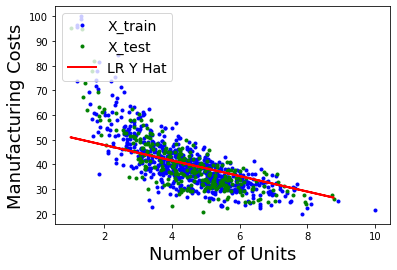

In [32]:
lasso = Lasso(alpha = 5)
lasso.fit(x_train,y_train)
y_hat = lasso.predict(x_test)
PrintInformation(y_test,y_hat,"Lasso",lasso,1)

plt.plot(x_train['Number of Units'], y_train, "b.", label= "X_train")
plt.plot(x_test['Number of Units'], y_test, "g.", label = "X_test")
plt.plot(x_test['Number of Units'], y_hat, "r-", linewidth=2, label="LR Y Hat")
plt.xlabel("Number of Units", fontsize=18)
plt.ylabel("Manufacturing Costs", fontsize=18)
plt.legend(loc="upper left", fontsize=14)

## Graphs

Text(0.5, 1.0, 'R2')

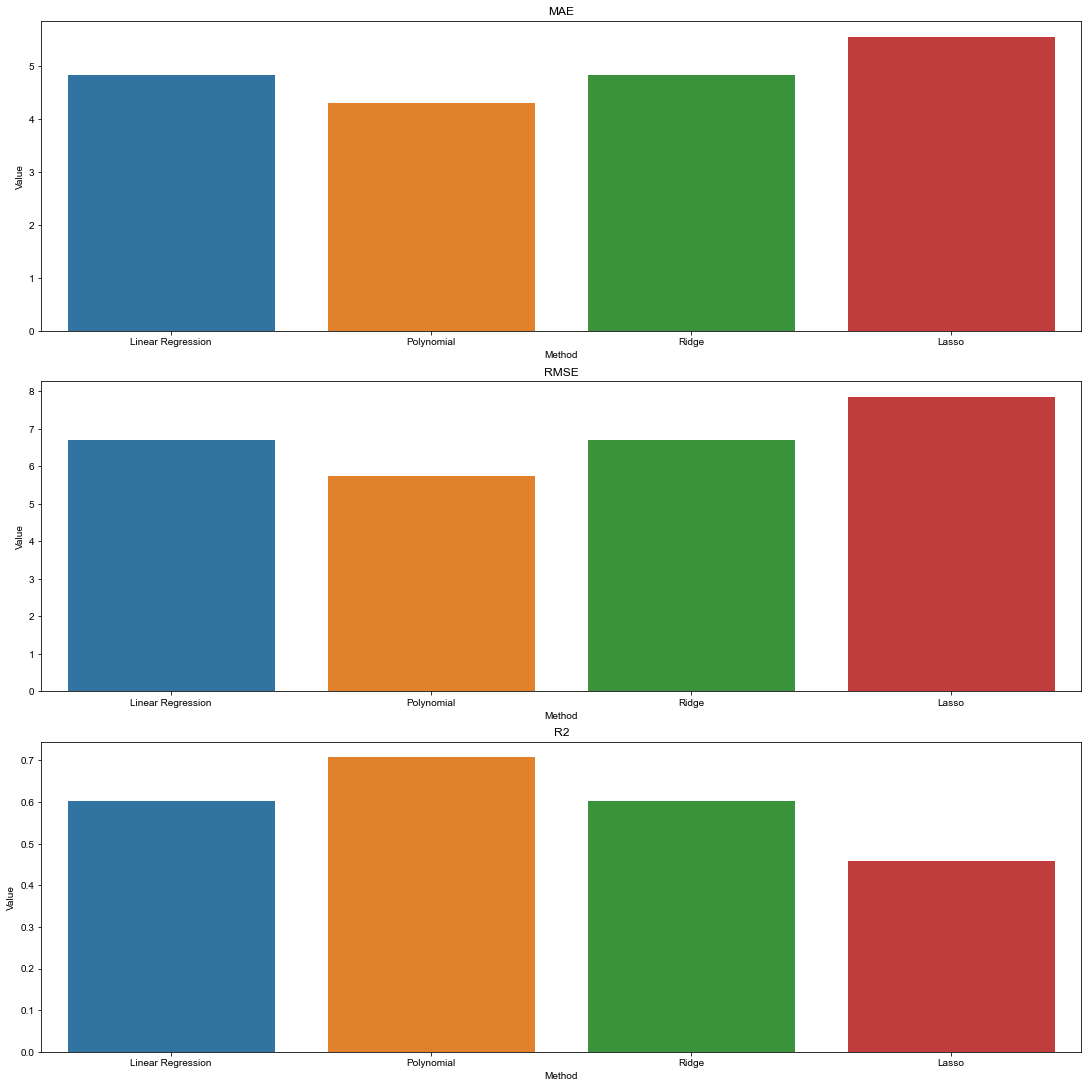

In [33]:
fig, axs = plt.subplots(3, 1, constrained_layout=True,figsize=(15, 15))

sns.set_style("darkgrid")

sns.barplot(ax=axs[0], data= dfErr[dfErr["Error Type"] == "MAE"],x= "Method",y = "Value")
axs[0].set_title('MAE')

sns.barplot(ax=axs[1],data= dfErr[dfErr["Error Type"] == "RMSE"],x= "Method",y = "Value")
axs[1].set_title('RMSE')

sns.barplot(ax=axs[2],data= dfErr[dfErr["Error Type"] == "R2"],x= "Method",y = "Value")
axs[2].set_title('R2')


## Conclusiones
Podemos ver que el polinomial se ajusto mucho mejor por como estaban los datos. Una regresión lineal no nos iba a poder ajustar tan bien los datos. Podríamos intentar con un polinomio de mayor orden para ver que ocurre.
Los errores de MAE y RMSE para el modelo polinomial son bajos, lo que nos dice que en general el modelo se ajusta de mejor manera a los valores reales. El R2 alto nos dice que hay una correlacion alta entre los resultados reales y los predecidos.

# Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [34]:
df = pd.read_csv('kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [36]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [37]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


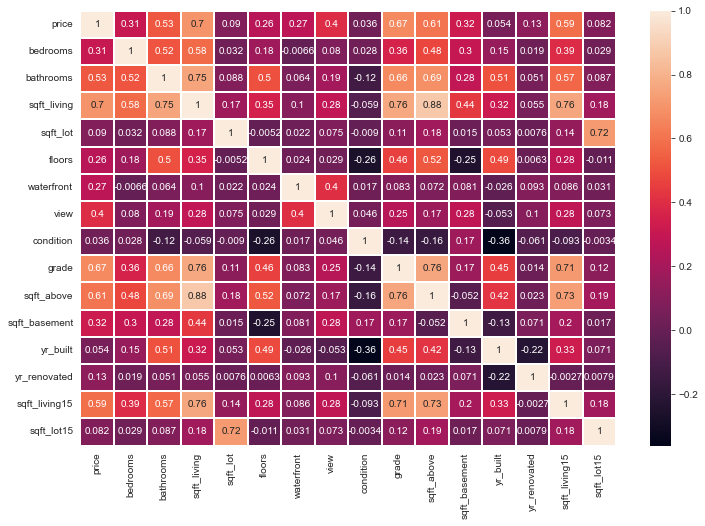

In [38]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, linewidths = 2)
plt.show()

In [39]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')
dfErr = pd.DataFrame(columns = ["Method","Error Type","Value"])

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


## Multiple Linear Regression

In [41]:
mlr = LinearRegression()
mlr.fit(X_train,y_train)
y_hat = mlr.predict(X_test)

PrintInformation(y_test,y_hat,"Multiple Linear Regression",mlr,1,"Multi")

===== Multiple Linear Regression =====
Y_hat = -38200.805X0 + 41466.138X1 + 107.993X2 + 0.017X3 + 31691.691X4 + 552691.023X5 + 41249.323X6 + 21222.144X7 + 119493.216X8 + 47.775X9 + 60.218X10 + -3550.902X11 + 13.260X12 + 29.006X13 + -0.548X14 + 6151359.263
Error medio Absoluto (MAE): 137480.13882733296
Root Mean Squared Error: 232133.3676240794
r2_score 0.657972320500768


## Multiple Polynomial Regression

In [42]:
poly_features = PolynomialFeatures(degree=2)
xp_train = poly_features.fit_transform(X_train)

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(xp_train, y_train)

xp_test = poly_features.transform(X_test)
y_hat = lin_reg.predict(xp_test)
PrintInformation(y_test,y_hat,"Multiple Polynomial",lin_reg,2,"Multi")

===== Multiple Polynomial =====
Y_hat = -336.244X0 + 933835.885X0^2 + -1092618.446X1 + -516.819X1^2 + -27.863X2 + -2074361.742X2^2 + -3954544.906X3 + -288632.698X3^2 + 558563.312X4 + 1098604.077X4^2 + -159.607X5 + -322.163X5^2 + -85971.010X6 + -2953.667X6^2 + 3999.668X7 + -34.010X7^2 + 957.457X8 + 7498.750X8^2 + -14.488X9 + -0.019X9^2 + 8577.846X10 + -11492.367X10^2 + -307.302X11 + -5245.540X11^2 + -5367.691X12 + -0.518X12^2 + -13.915X13 + -467.065X13^2 + -9.132X14 + 17.279X14^2 + 0.216X15 + -9630.929X15^2 + 15.513X16 + -0.136X16^2 + -25905.721X17 + 43372.607X17^2 + 3828.919X18 + -1080.933X18^2 + 22296.877X19 + 14.303X19^2 + 1.212X20 + 503.054X20^2 + -17.085X21 + -17.288X21^2 + -0.056X22 + 2.077X22^2 + -1.641X23 + 4.836X23^2 + 160.302X24 + -14.264X24^2 + 13.117X25 + 20.734X25^2 + -2.286X26 + -1.450X26^2 + 0.345X27 + 0.059X27^2 + 0.590X28 + -0.103X28^2 + 0.000X29 + 0.441X29^2 + -0.098X30 + -0.098X30^2 + 0.092X31 + 0.152X31^2 + 1.640X32 + 1.641X32^2 + 0.014X33 + -0.000X33^2 + 0.000X34 + 

## Ridge Regression

In [43]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso
mrr = Ridge(alpha=10)
mrr.fit(X_train,y_train)

y_hat = mrr.predict(X_test)
PrintInformation(y_test,y_hat,"Multiple Ridge",mrr,1,"Multi")

===== Multiple Ridge =====
Y_hat = -38370.747X0 + 41319.421X1 + 108.192X2 + 0.015X3 + 31665.418X4 + 511363.720X5 + 43172.040X6 + 21259.955X7 + 119274.452X8 + 48.079X9 + 60.122X10 + -3547.074X11 + 13.793X12 + 28.817X13 + -0.547X14 + 6145564.309
Error medio Absoluto (MAE): 137585.1997383721
Root Mean Squared Error: 232447.746726882
r2_score 0.6570452743997122


## Lasso Regression

In [44]:
mlssr = Lasso(alpha = 1)
mlssr.fit(X_train,y_train)
y_hat = mlssr.predict(X_test)
PrintInformation(y_test,y_hat,"Multiple Lasso",mlssr,1)

===== Multiple Lasso =====
Y_hat = -38199.535X0 + 41461.857X1 + 293.480X2 + 0.017X3 + 31687.141X4 + 552541.108X5 + 41254.965X6 + 21219.390X7 + 119491.837X8 + -137.708X9 + -125.268X10 + -3550.850X11 + 13.263X12 + 29.005X13 + -0.548X14 + 6151280.114
Error medio Absoluto (MAE): 137480.57154885164
Root Mean Squared Error: 232134.52753802208
r2_score 0.6579689024340811


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  model = cd_fast.enet_coordinate_descent(


## Graphs

Text(0.5, 1.0, 'R2')

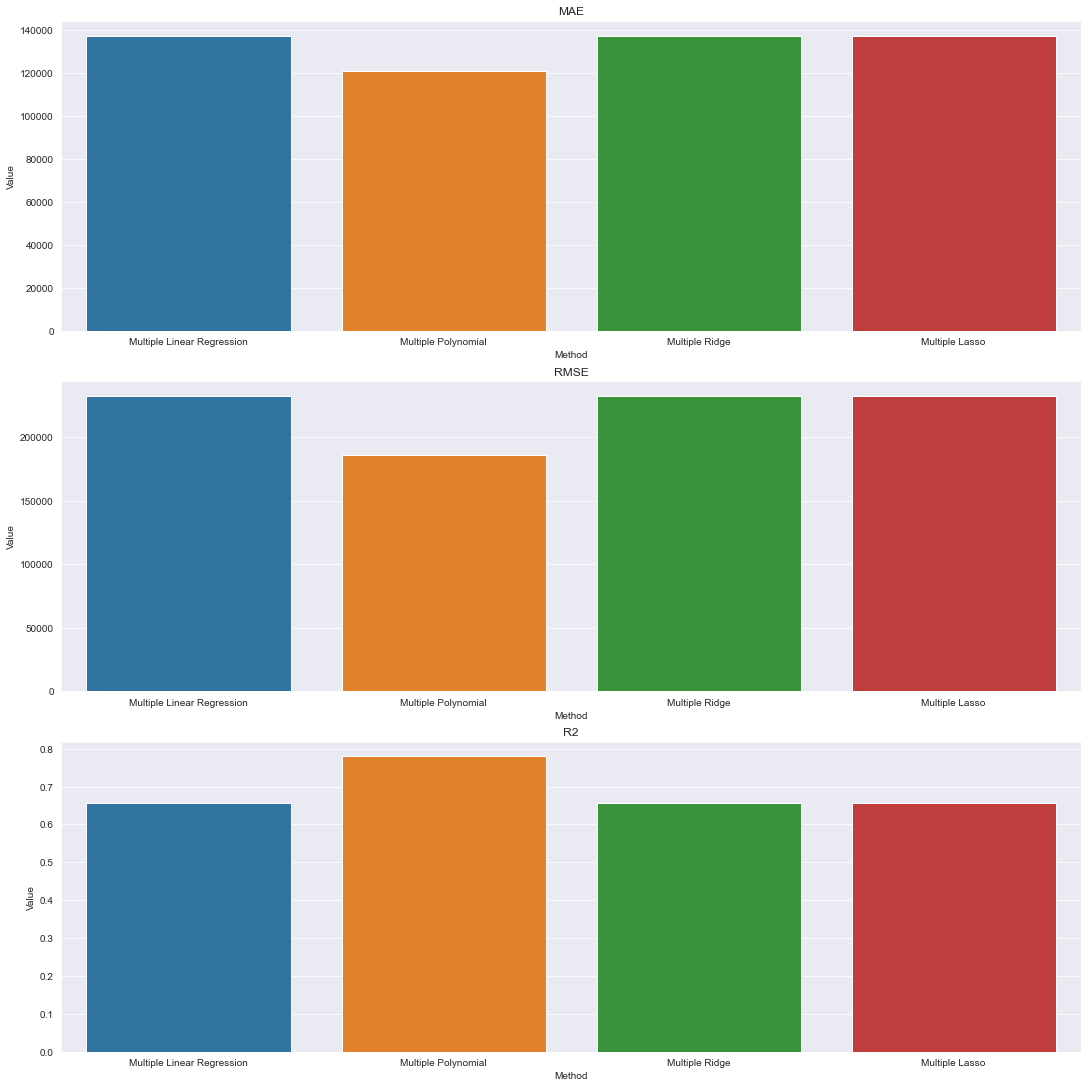

In [45]:
fig, axs = plt.subplots(3, 1, constrained_layout=True,figsize=(15, 15))

sns.set_style("darkgrid")

sns.barplot(ax=axs[0], data= dfErr[dfErr["Error Type"] == "MAE"],x= "Method",y = "Value")
axs[0].set_title('MAE')

sns.barplot(ax=axs[1],data= dfErr[dfErr["Error Type"] == "RMSE"],x= "Method",y = "Value")
axs[1].set_title('RMSE')

sns.barplot(ax=axs[2],data= dfErr[dfErr["Error Type"] == "R2"],x= "Method",y = "Value")
axs[2].set_title('R2')

## Conclusiones

Una vez mas el método que mejor se aproxima es el polinomial dado que su error es más  bajo y su R2 es el más alto. 
Use el 10% de datos para probar mi modelo y el 90% para entrenarlo. El resultado fue bueno dado que su al momento de probar los modelos con datos no vistos, estos actuaron de buena manera, demostrando que generalizan bien.